# Video


# Data Import

In [3]:
# importing the tools and package 
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#impoting the data
df = pd.read_csv(r'D:\polimi\terms\September 2020\machine learning\project\Regression\model.csv')

In [5]:
df.shape

(12000, 23)

In [6]:
df.head()

,id,duration,codec,width,height,bitrate,category,framerate,i,p,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,1,645.84000,vp8,320,240,95903,People & Blogs,25.032558,138,16008,...,6660941,0,7742262,vp8,109000,29.97,1280,720,218932,15.929
1,2,326.58832,h264,1920,1080,5999648,People & Blogs,23.000000,174,7656,...,228322925,0,244926878,flv,820000,29.97,1920,1080,218932,10.417
2,3,473.00000,h264,320,240,164017,Sports,25.000000,198,10924,...,8047423,0,9697521,h264,242000,24.00,1920,1080,645544,45.327
3,4,448.57500,vp8,1280,720,2052426,Gaming,30.002232,92,13349,...,105950761,0,115083398,h264,3000000,15.00,1920,1080,655172,102.842
4,5,255.28000,flv,320,240,250276,Music,25.000000,110,6272,...,7374864,0,7986338,mpeg4,820000,25.00,1920,1080,216820,14.937


In [7]:
df.isnull().sum()          #showing the missing value for each features

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

As can be seen above, there is no missing value

# Split categorical/continuos variables

In [9]:
df.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'category',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime'],
      dtype='object')

In [10]:
df.dtypes     #  type of each feature : float, integer, string

id               int64
duration       float64
codec           object
width            int64
height           int64
bitrate          int64
category        object
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [8]:
df_categorical=df[['codec','category','o_codec']]     #choosing the categorical features
df_categorical.head()

,codec,category,o_codec
0,vp8,People & Blogs,vp8
1,h264,People & Blogs,flv
2,h264,Sports,h264
3,vp8,Gaming,h264
4,flv,Music,mpeg4


In [9]:
df_numerical=df.select_dtypes(exclude='object')   #excluding the categorical features and the extra as numerical features
df_numerical.columns

Index(['id', 'duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p',
       'b', 'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem', 'utime'],
      dtype='object')

# Categorical Data

In [12]:
df['codec'].value_counts()     #count the  value corresponding to the categorical features"codec"

h264     6003
vp8      3245
mpeg4    1600
flv      1152
Name: codec, dtype: int64

In [13]:
df['o_codec'].value_counts()  #count the  value corresponding to the categorical features"o_codec"

h264     6086
vp8      4232
mpeg4    1609
flv        73
Name: o_codec, dtype: int64

In [14]:
df['category'].value_counts()  #count the  value corresponding to the categorical features"category"

People & Blogs          2804
Music                   1852
Entertainment           1488
Gaming                  1281
Comedy                   776
Sports                   716
Autos & Vehicles         478
News & Politics          451
Film & Animation         422
Education                381
Travel & Events          362
Pets & Animals           305
Howto & Style            267
Science & Technology     258
Nonprofits & Activis     132
Shows                     27
Name: category, dtype: int64

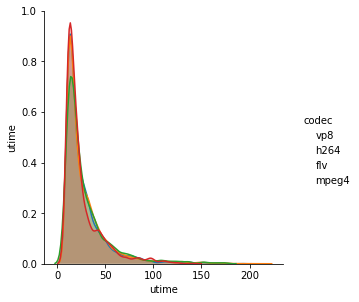

In [19]:
sns.pairplot(data=df[["codec","utime"]], hue="codec", height=4)   #drawing the pair plot of categorical attribute"codec"
                                                                  # matching to the target "utime"

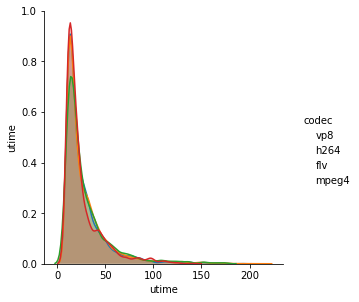

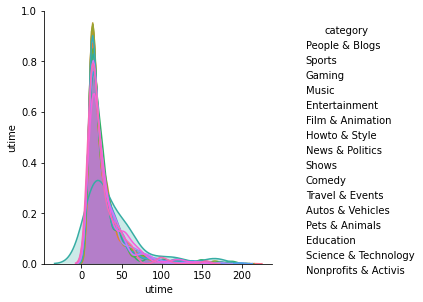

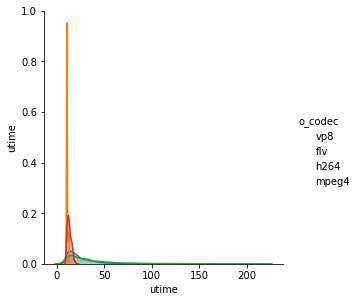

In [42]:
#drawing the pair plot of categorical attributes  matching to the target "utime"
                                                                 
for i in df_categorical.columns:
        sns.pairplot(data = df[[i,"utime"]], hue = i, height =4)
plt.show()    


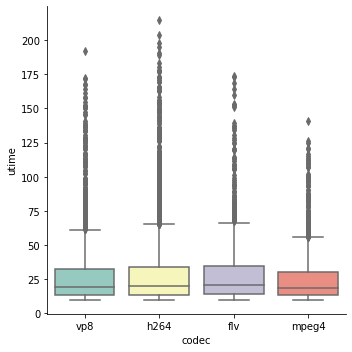

In [33]:
sns.catplot(data=df, x="codec", y="utime",kind="box", palette="Set3")   #drawing the barlpot

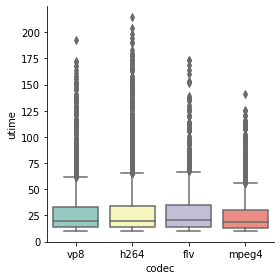

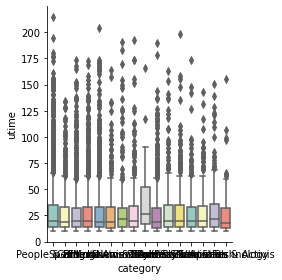

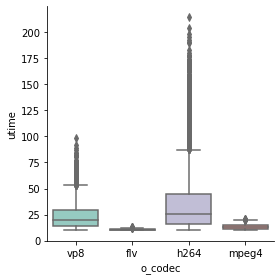

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="utime",kind="box", palette="Set3",height=4);
plt.show()

In [10]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=False)   # hot encoding the categorical attributes with dummies

dummies.tail()

,codec_flv,codec_h264,codec_mpeg4,codec_vp8,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,...,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
11997,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11998,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11999,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Numerical Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000133D78B0>,
      dtype=object)

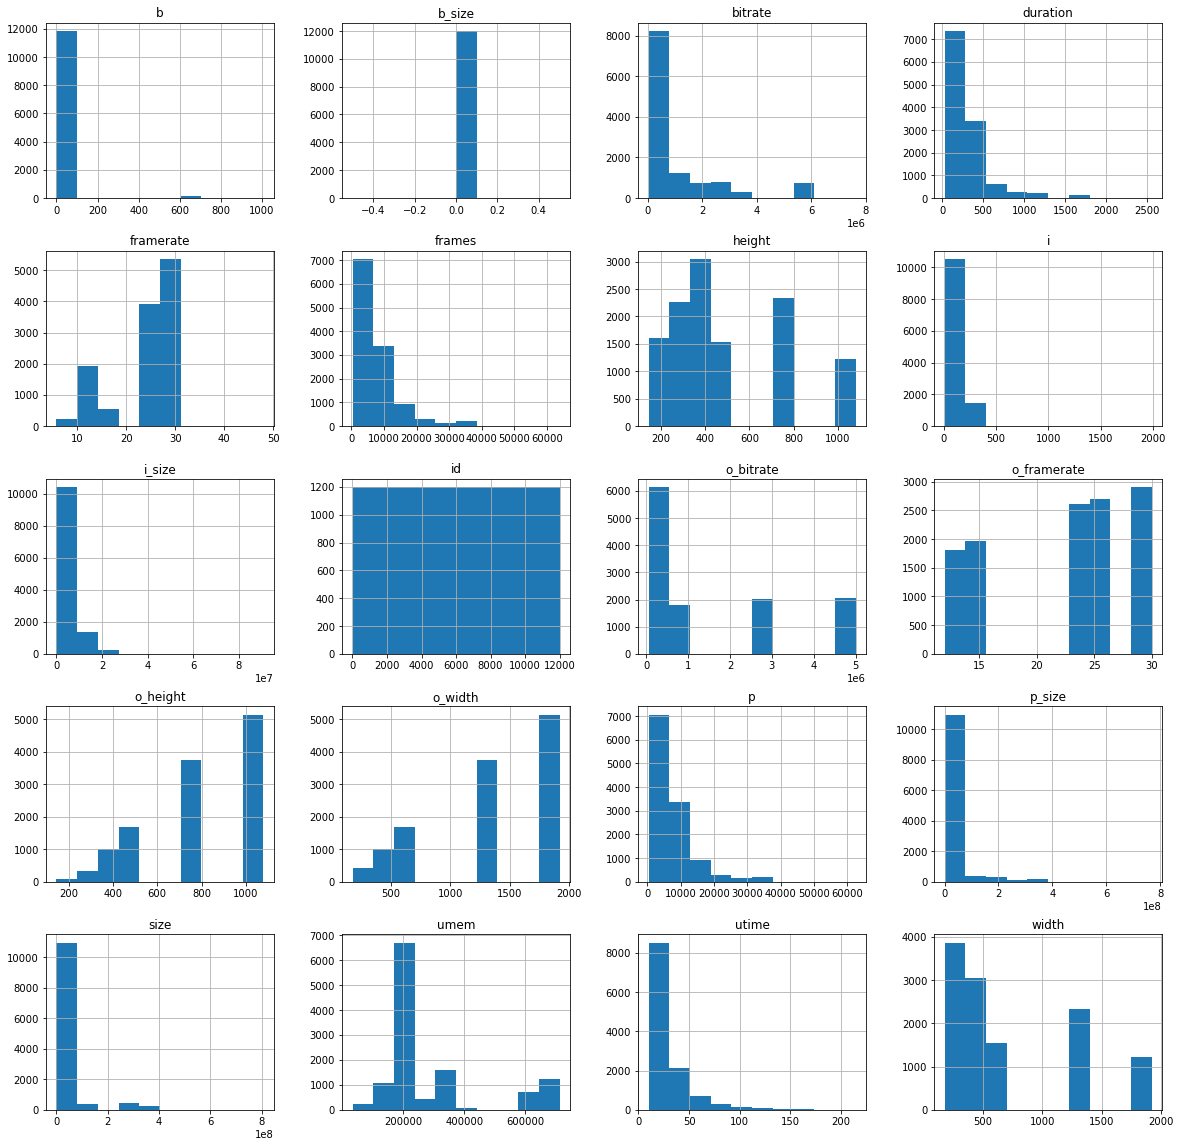

In [101]:
df_numerical.hist(figsize=(20,20))    #drawing the histogram of numerical attributes

# outlier detection

In [102]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [103]:
df_numerical1= outlier_detect(df_numerical)    #producing the new df_numrical1 without outliers
df_numerical1

,id,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,1,645.840000,320,240,95903.0,25.032558,138.0,16008.0,0.0,16146.0,1081321.0,6660941.0,0,7742262.0,109000,29.97,1280,720,218932.0,15.929
1,2,326.588320,1920,1080,382461.0,23.000000,174.0,7656.0,0.0,7830.0,1259657.0,6965881.0,0,9656655.0,820000,29.97,1920,1080,218932.0,10.417
2,3,473.000000,320,240,164017.0,25.000000,198.0,10924.0,0.0,11826.0,1419320.0,8047423.0,0,9697521.0,242000,24.00,1920,1080,219480.0,45.327
3,4,448.575000,1280,720,2052426.0,30.002232,92.0,13349.0,0.0,13441.0,1259657.0,6965881.0,0,9656655.0,3000000,15.00,1920,1080,219480.0,19.437
4,5,255.280000,320,240,250276.0,25.000000,110.0,6272.0,0.0,6382.0,611474.0,7374864.0,0,7986338.0,820000,25.00,1920,1080,216820.0,14.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,49.178333,176,144,54338.0,25.039877,10.0,334.0,0.0,344.0,33046.0,300986.0,0,334032.0,5000000,29.97,1280,720,324540.0,34.462
11996,11997,80.536000,480,360,690041.0,29.000000,43.0,2374.0,0.0,2417.0,618732.0,6327913.0,0,6946645.0,820000,15.00,1920,1080,219480.0,19.437
11997,11998,750.433000,1280,720,794075.0,13.482667,81.0,10031.0,0.0,10112.0,3852576.0,6965881.0,0,9656655.0,820000,29.97,1280,720,327492.0,33.402
11998,11999,473.000000,320,240,164017.0,25.000000,198.0,10924.0,0.0,11826.0,1419320.0,8047423.0,0,9697521.0,242000,25.00,1280,720,318500.0,30.266


In [ ]:
As above, the number of the df_nymerical1 is equal to to the df_numerical meaning that we dont have outliers

In [67]:
df_numerical['size'].value_counts()

29256190     418
244926878    311
48993895     267
12766479     239
115083398    220
            ... 
2142778        1
20400581       1
79403407       1
2687220        1
32013396       1
Name: size, Length: 264, dtype: int64

In [11]:
# dedicating the log function to the to the numerical attributes: "duration", "i","p","frames"
import math
pd.options.mode.chained_assignment = None
df_numerical['log_duration']=df_numerical['duration'].apply(lambda x: math.log(x))
df_numerical['log_i']=df_numerical['i'].apply(lambda x: math.log(x))
df_numerical['log_frames']=df_numerical['frames'].apply(lambda x: math.log(x))
df_numerical['log_p']=df_numerical['p'].apply(lambda x: math.log(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012321AF0>,
      dtype=object)

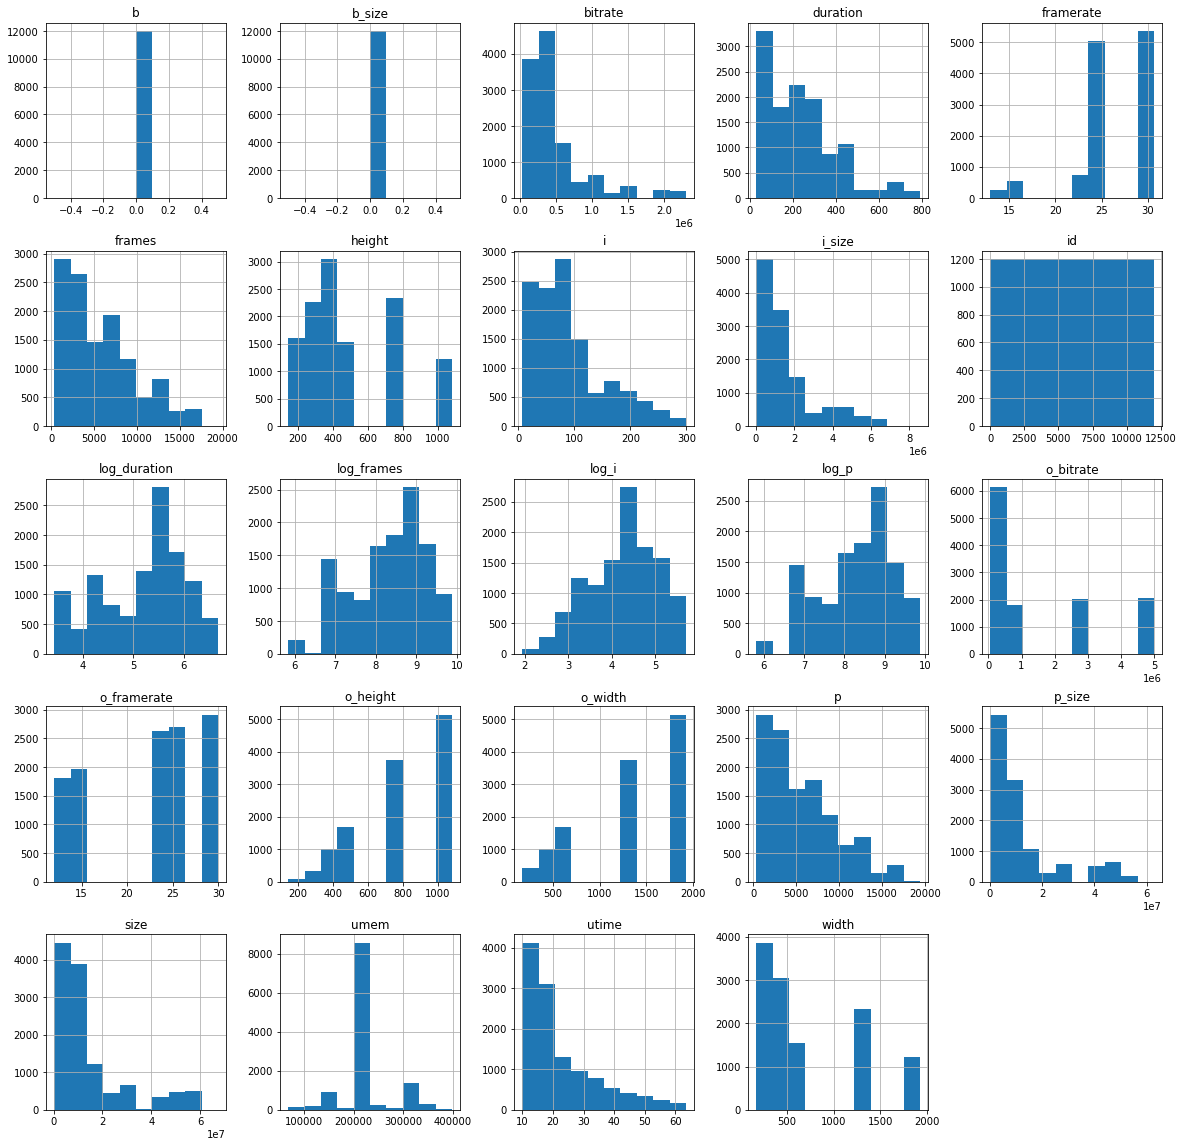

In [105]:
df_numerical.hist(figsize=(20,20))

In [12]:
# droping the "id" and other numerical attributes wnich already transformed to log
df_numerical=df_numerical.drop(['frames','i','p','id','duration'], axis=1)
df_numerical.columns


Index(['width', 'height', 'bitrate', 'framerate', 'b', 'i_size', 'p_size',
       'b_size', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime', 'log_duration', 'log_i', 'log_frames', 'log_p'],
      dtype='object')

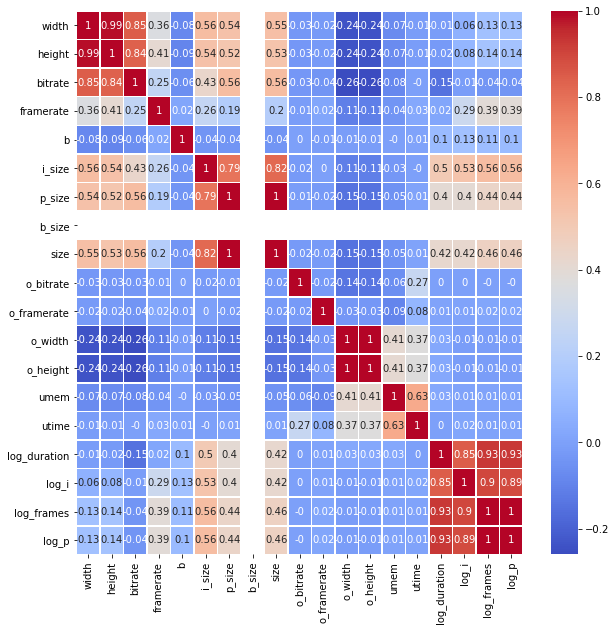

In [131]:
#drawing the correlation Matrix among the numerical attributes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":10})
plt.show()

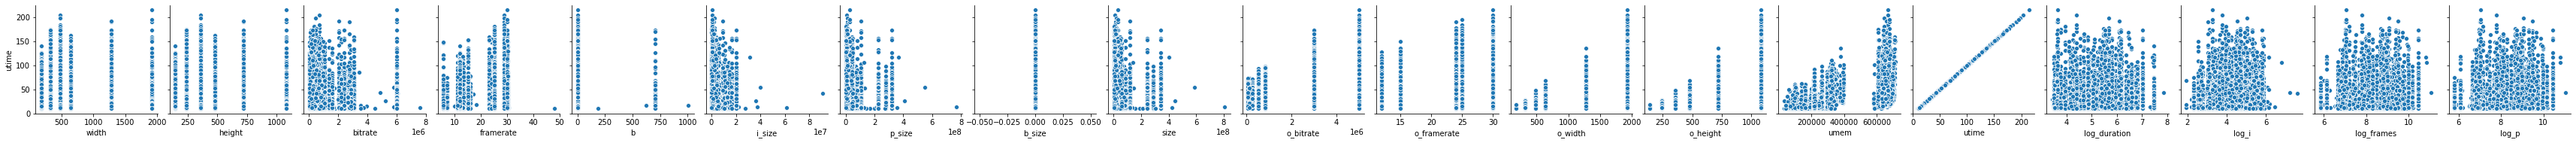

In [13]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='utime')

In [14]:
df_numerical=df_numerical.drop(["log_p","height","size" ,"o_width"] , axis = 1)   #removing the correlated varibles

# Standarize

In [15]:
# standarize the numerical attributes and put them in similar scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,width,bitrate,framerate,b,i_size,p_size,b_size,o_bitrate,o_framerate,o_height,umem,utime,log_duration,log_i,log_frames
0,-0.761638,-0.616648,0.144284,-0.110700,-0.455126,-0.379757,0.0,-0.821838,1.180610,-0.260022,-0.473726,-0.519115,1.313222,0.741251,1.300270
1,2.195893,3.314699,-0.153337,-0.110700,2.764643,3.123759,0.0,-0.432345,1.180610,1.029022,-0.473726,-0.754353,0.570477,1.015755,0.571877
2,-0.761638,-0.571290,0.139516,9.013614,-0.385017,-0.357843,0.0,-0.748979,0.250827,1.029022,2.146757,0.735516,0.973950,1.168770,0.986883
3,1.012880,0.686215,0.871977,-0.110700,1.214911,1.189585,0.0,0.761883,-1.150855,1.029022,2.205898,3.190108,0.916196,0.261091,1.115721
4,-0.761638,-0.513849,0.139516,-0.110700,-0.552584,-0.368473,0.0,-0.432345,0.406570,1.029022,-0.486699,-0.561451,0.302138,0.472702,0.366073


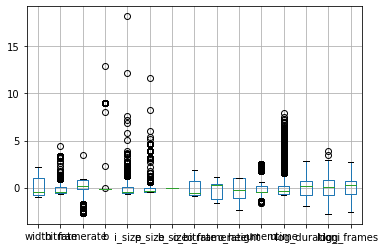

In [136]:
scaled_df.boxplot()

In [16]:
X_numerical=scaled_df.drop(["utime"], axis=1)    #droping the target from the standarized numerical features

In [139]:
X_numerical.columns

Index(['width', 'bitrate', 'framerate', 'b', 'i_size', 'p_size', 'b_size',
       'o_bitrate', 'o_framerate', 'o_height', 'umem', 'log_duration', 'log_i',
       'log_frames'],
      dtype='object')

In [17]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12000, 24)
(12000, 14)


,codec_flv,codec_h264,codec_mpeg4,codec_vp8,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,...,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
11997,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11998,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11999,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
# putting together two dummies and numerical attributes
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,codec_flv,codec_h264,codec_mpeg4,codec_vp8,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,...,i_size,p_size,b_size,o_bitrate,o_framerate,o_height,umem,log_duration,log_i,log_frames
11995,0,0,1,0,0,1,0,0,0,0,...,-0.672564,-0.480280,0.0,1.857504,1.180610,-0.260022,0.174976,-1.491849,-2.366931,-2.573421
11996,0,1,0,0,0,0,0,0,0,0,...,-0.551078,-0.385021,0.0,-0.432345,-1.150855,1.029022,2.200148,-0.954548,-0.639612,-0.611164
11997,0,0,0,1,0,0,0,0,0,1,...,0.119699,0.631396,0.0,-0.432345,1.180610,-0.260022,0.193108,1.476725,0.110294,0.829293
11998,0,1,0,0,0,0,0,1,0,0,...,-0.385017,-0.357843,0.0,-0.748979,0.406570,-0.260022,0.137875,0.973950,1.168770,0.986883
11999,0,0,0,1,0,0,0,0,0,0,...,-0.629951,-0.476191,0.0,-0.821838,0.250827,1.029022,-0.800706,-1.888535,-1.810344,-1.478485


In [121]:
X.shape

(12000, 38)

# Separate Train/Test sets


In [123]:
y=df['utime']

In [84]:
y

0         15.929
1         10.417
2         45.327
3        102.842
4         14.937
          ...   
11995     34.462
11996     68.984
11997     33.402
11998     30.266
11999     12.113
Name: utime, Length: 12000, dtype: float64

In [85]:
df.utime

0         15.929
1         10.417
2         45.327
3        102.842
4         14.937
          ...   
11995     34.462
11996     68.984
11997     33.402
11998     30.266
11999     12.113
Name: utime, Length: 12000, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8400, 38) (3600, 38)


# Models


In [125]:
from sklearn.model_selection import GridSearchCV
def gs_regression(model, par) :
    gs = GridSearchCV(regressor, parameters,cv=3,scoring ='neg_mean_absolute_error') #with no params it reduces to a CV
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, gs.predict(X_train)), metrics.mean_absolute_error(y_test, gs.predict(X_test))) ) 
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, gs.predict(X_train)), metrics.mean_squared_error(y_test, gs.predict(X_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, gs.predict(X_train)), metrics.r2_score(y_test, gs.predict(X_test))) ) 


# Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}          # linear regression has no hyper-parameter

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -9.364538 using {}

MAE  train 9.302    test 09.370
MSE  train 192.001 test 195.397
RMSE train 13.856   test 13.978
r2   train 0.649     test 0.646


In [127]:
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

In [128]:
gs.score(X_test, y_test)

0.6461686018079564

In [129]:
# obtaining the error of train and test set
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    8400.000000
mean        0.001301
std        13.857255
min      -118.828852
25%        -5.727363
50%        -0.157191
75%         7.319881
max        51.771109
Name: utime, dtype: float64

In [117]:
X_train.shape

(8400, 38)

In [60]:
y_train=pd.DataFrame(y_train)

In [61]:
y_train

,utime
4975,10.241
6448,10.297
6958,60.340
7492,61.704
11533,16.765
...,...
7763,30.078
5218,20.489
1346,24.794
11646,16.609


In [62]:
y_train.shape

(8400, 1)

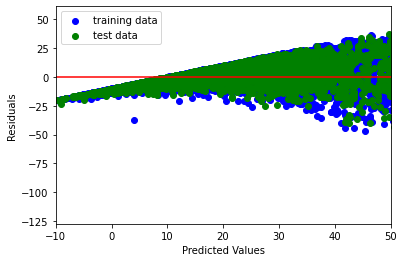

In [130]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [131]:
error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

# Cheking the Normality of the Residuals

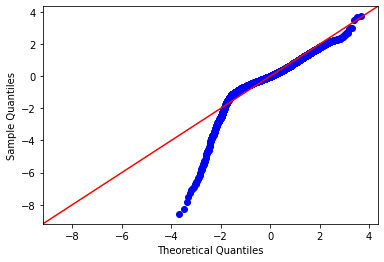

In [132]:
# Quantiles method
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

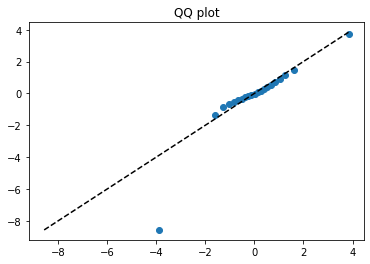

In [133]:
#QQ plot distribution of residual in comparasion to the normal  distribution
import scipy

# We test a uniform distribution
dist = getattr(scipy.stats, 'norm')
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(0,1,size = len(scaled_error_train))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_b = np.percentile(scaled_error_train, percs)
q_a = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

In [134]:
# Kolmogorov-Smirnov Test       # checking normality of errors with respect to the normal function
from scipy import stats
print(stats.kstest(scaled_error_train, 'norm'))

# D’Agostino Test               # cheking the normality of error and how it can be fits into normality
print(stats.normaltest(scaled_error_train))

KstestResult(statistic=0.1029291525383769, pvalue=6.191366558121906e-78)
NormaltestResult(statistic=3459.0529764065213, pvalue=0.0)


In [135]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we want to add a constant to our model 
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
est_fit.params

const                            9.328376e+00
codec_flv                        4.542990e+00
codec_h264                       1.414462e+00
codec_mpeg4                      1.771977e-01
codec_vp8                        3.193726e+00
category_Autos & Vehicles        3.186111e-01
category_Comedy                  4.388612e-01
category_Education              -4.480256e-01
category_Entertainment          -3.769560e-02
category_Film & Animation        8.596679e-01
category_Gaming                 -2.890134e-01
category_Howto & Style           1.643665e+00
category_Music                  -3.016643e-03
category_News & Politics         1.049091e-02
category_Nonprofits & Activis   -8.840471e-01
category_People & Blogs          5.594462e-01
category_Pets & Animals          5.621963e-01
category_Science & Technology   -1.098225e+00
category_Shows                   7.765699e+00
category_Sports                 -1.328640e+00
category_Travel & Events         1.258402e+00
o_codec_flv                     -2

In [136]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  utime   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     455.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:39:42   Log-Likelihood:                -34001.
No. Observations:                8400   AIC:                         6.807e+04
Df Residuals:                    8365   BIC:                         6.832e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10,100], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -9.019401 using {'alpha': 0.1, 'normalize': True}

MAE  train 8.975    test 09.067
MSE  train 197.876 test 202.366
RMSE train 14.067   test 14.226
r2   train 0.639     test 0.634


# Lasso Regression

In [153]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160383.0849712197, tolerance: 310.48845674351173
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103512.75367989484, tolerance: 304.2348356260068
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148110.70371927595, tolerance: 305.33448990855175
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

***GRIDSEARCH RESULTS***
Best score: -9.031012 using {'alpha': 0.01, 'normalize': True}

MAE  train 9.050    test 09.072
MSE  train 209.906 test 212.426
RMSE train 14.488   test 14.575
r2   train 0.617     test 0.615


# KNN

In [155]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(5,30,5),
              'p': [1,2,3]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -6.973272 using {'n_neighbors': 5, 'p': 3}

MAE  train 5.329    test 06.755
MSE  train 73.074 test 113.853
RMSE train 8.548   test 10.670
r2   train 0.867     test 0.794


# Decision Tree

In [156]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": [6,5,4]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -5.477319 using {'max_depth': 7, 'min_samples_leaf': 4}

MAE  train 4.896    test 05.254
MSE  train 63.033 test 73.166
RMSE train 7.939   test 8.554
r2   train 0.885     test 0.868


# Random Forest  (Best Model)

In [105]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,50], "criterion": ['mse'], 
              "min_samples_leaf": [5,10,20], "random_state" : [42]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3.621080 using {'criterion': 'mse', 'min_samples_leaf': 5, 'n_estimators': 50, 'random_state': 42}

MAE  train 2.126    test 03.012
MSE  train 14.578 test 26.338
RMSE train 3.818   test 5.132
r2   train 0.973     test 0.952


In [106]:
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

In [107]:
gs.score(X_test, y_test)

0.9523067250507761

.










Analyzing the residual distribution of the best model(Random Forest)

In [108]:
#obtaiing the error_train and error_test
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    8400.000000
mean        0.023201
std         3.818273
min       -42.590953
25%        -0.965584
50%         0.173754
75%         1.167287
max        37.734235
Name: utime, dtype: float64

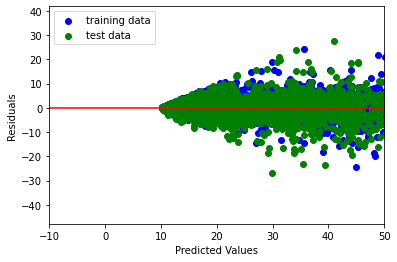

In [109]:
#plotting the residuals of Random Forest residuals
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [110]:
error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

In [111]:
# Kolmogorov-Smirnov Test
from scipy import stats
print(stats.kstest(scaled_error_train, 'norm'))

# D’Agostino Test
print(stats.normaltest(scaled_error_train))

KstestResult(statistic=0.15807004950074144, pvalue=8.536372510233588e-184)
NormaltestResult(statistic=2859.9569135854663, pvalue=0.0)


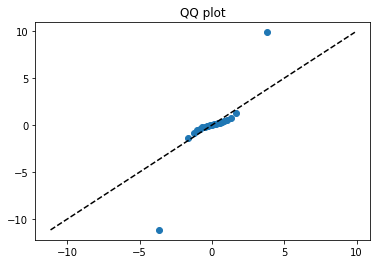

In [112]:
import scipy

# We test a uniform distribution
dist = getattr(scipy.stats, 'norm')
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(0,1,size = len(scaled_error_train))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_b = np.percentile(scaled_error_train, percs)
q_a = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

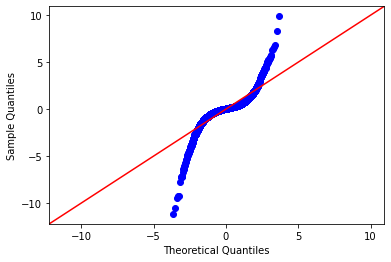

In [113]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

# SVM

In [158]:
from sklearn.svm import SVR

regressor = SVR()            
parameters = {'C': [0.1,1,10,1000],     #setting hyperparameters
             'epsilon': [0.01,0.1,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3,4]
             }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -4.185134 using {'C': 1000, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

MAE  train 3.032    test 03.819
MSE  train 38.242 test 45.312
RMSE train 6.184   test 6.731
r2   train 0.930     test 0.918


In [ ]:
NN Regressor

In [159]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[1000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -5.874166 using {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}

MAE  train 5.738    test 05.870
MSE  train 88.752 test 93.668
RMSE train 9.421   test 9.678
r2   train 0.838     test 0.830


In [160]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -8.724225 using {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 5, 'random_state': 0}

MAE  train 8.987    test 09.150
MSE  train 155.976 test 163.786
RMSE train 12.489   test 12.798
r2   train 0.715     test 0.703


# Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,150], "learning_rate":[0.1,0.5,1,2],    #setting the hyper-parameters
              "loss": ['ls', 'lad'], "random_state" : [0] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

***GRIDSEARCH RESULTS***
Best score: -4.407253 using {'learning_rate': 0.5, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 150, 'random_state': 0}

MAE  train 3.927    test 04.218
MSE  train 37.513 test 44.701
RMSE train 6.125   test 6.686
r2   train 0.932     test 0.919
